In [1]:
import pandas as pd 
import numpy as np 
ht= pd.read_table("C:\\Users\\melek\\Downloads\\archive (3)\\heart_failure_clinical_records_dataset.csv", delimiter =","  )

## data preprocessing

In [2]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
ht.shape

(299, 13)

In [4]:
ht.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
ht.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
ht.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## data visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

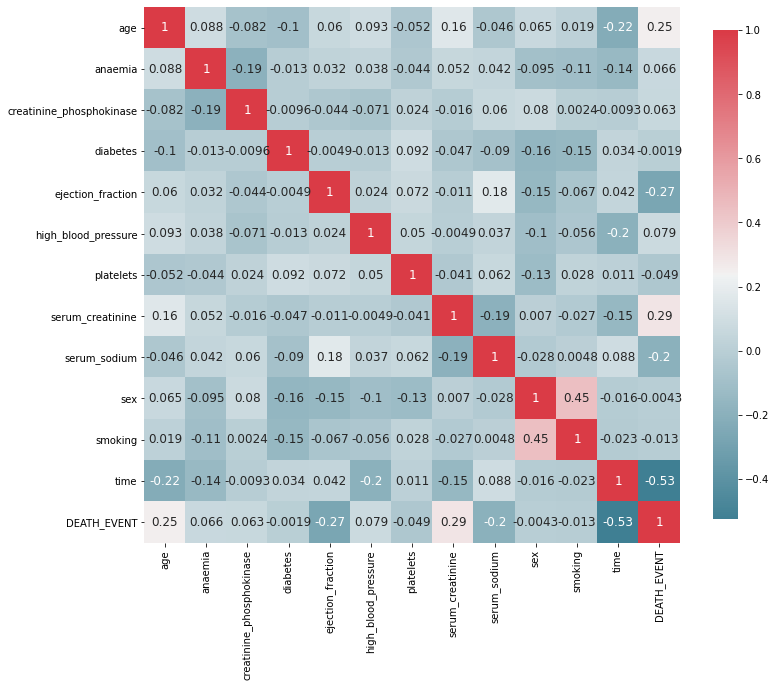

In [9]:
plot_correlation_map(ht)

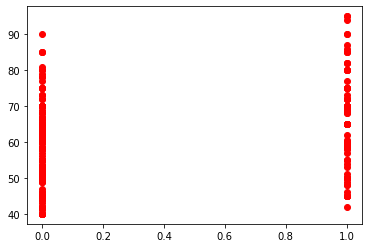

In [10]:
plt.plot(ht['DEATH_EVENT'],ht['age'],'ro')
plt.show()


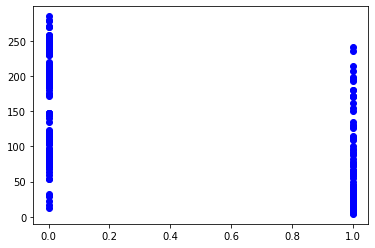

In [11]:
plt.plot(ht['DEATH_EVENT'],ht['time'],'bo')
plt.show()


<AxesSubplot:title={'center':'DEATH EVENT FREQUENCY'}, xlabel='Alive', ylabel='Number'>

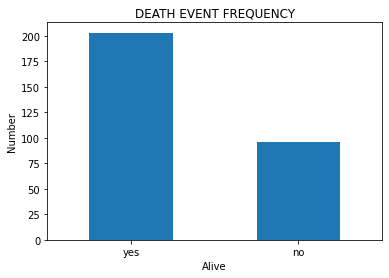

In [12]:
dict= {"DEATH_EVENT" : {1 : "no" , 0 : "yes"}}
plt.xlabel("Alive")
plt.ylabel("Number")
plt.title("DEATH EVENT FREQUENCY")
vc=ht.replace(dict, inplace = False)['DEATH_EVENT'].value_counts()
vc.plot.bar(rot=0)

## trainig&testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y=ht['DEATH_EVENT']
x=ht[['time','serum_creatinine']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
X = ht
y = ht['DEATH_EVENT']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

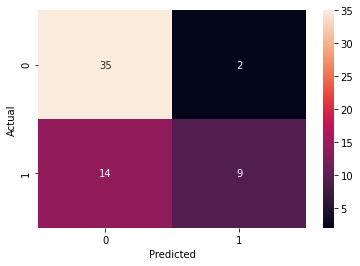

In [19]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81        37
           1       0.82      0.39      0.53        23

    accuracy                           0.73        60
   macro avg       0.77      0.67      0.67        60
weighted avg       0.75      0.73      0.70        60



<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

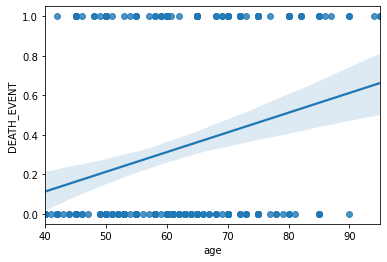

In [30]:
sns.regplot(x='age',y='DEATH_EVENT',data=ht)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [37]:
x=ht.drop(["DEATH_EVENT"], axis=1 )
y= ht["DEATH_EVENT"]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [39]:
treee = DecisionTreeClassifier(criterion = "gini", splitter='random', max_leaf_nodes = 10, min_samples_leaf=5, max_depth=5)  
treee.fit(x_train, y_train)  
y_pred=treee.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.85


[Text(837.0, 996.6, 'time <= 140.936\ngini = 0.443\nsamples = 100.0%\nvalue = [0.669, 0.331]'),
 Text(304.3636363636364, 815.4000000000001, 'time <= 40.972\ngini = 0.5\nsamples = 57.7%\nvalue = [0.514, 0.486]'),
 Text(152.1818181818182, 634.2, 'gini = 0.219\nsamples = 16.7%\nvalue = [0.125, 0.875]'),
 Text(456.54545454545456, 634.2, 'time <= 52.78\ngini = 0.44\nsamples = 41.0%\nvalue = [0.673, 0.327]'),
 Text(304.3636363636364, 453.0, 'gini = 0.0\nsamples = 2.9%\nvalue = [0.0, 1.0]'),
 Text(608.7272727272727, 453.0, 'ejection_fraction <= 31.012\ngini = 0.399\nsamples = 38.1%\nvalue = [0.725, 0.275]'),
 Text(304.3636363636364, 271.79999999999995, 'ejection_fraction <= 23.788\ngini = 0.488\nsamples = 10.9%\nvalue = [0.423, 0.577]'),
 Text(152.1818181818182, 90.59999999999991, 'gini = 0.0\nsamples = 2.5%\nvalue = [0.0, 1.0]'),
 Text(456.54545454545456, 90.59999999999991, 'gini = 0.495\nsamples = 8.4%\nvalue = [0.55, 0.45]'),
 Text(913.0909090909091, 271.79999999999995, 'age <= 76.791\ngin

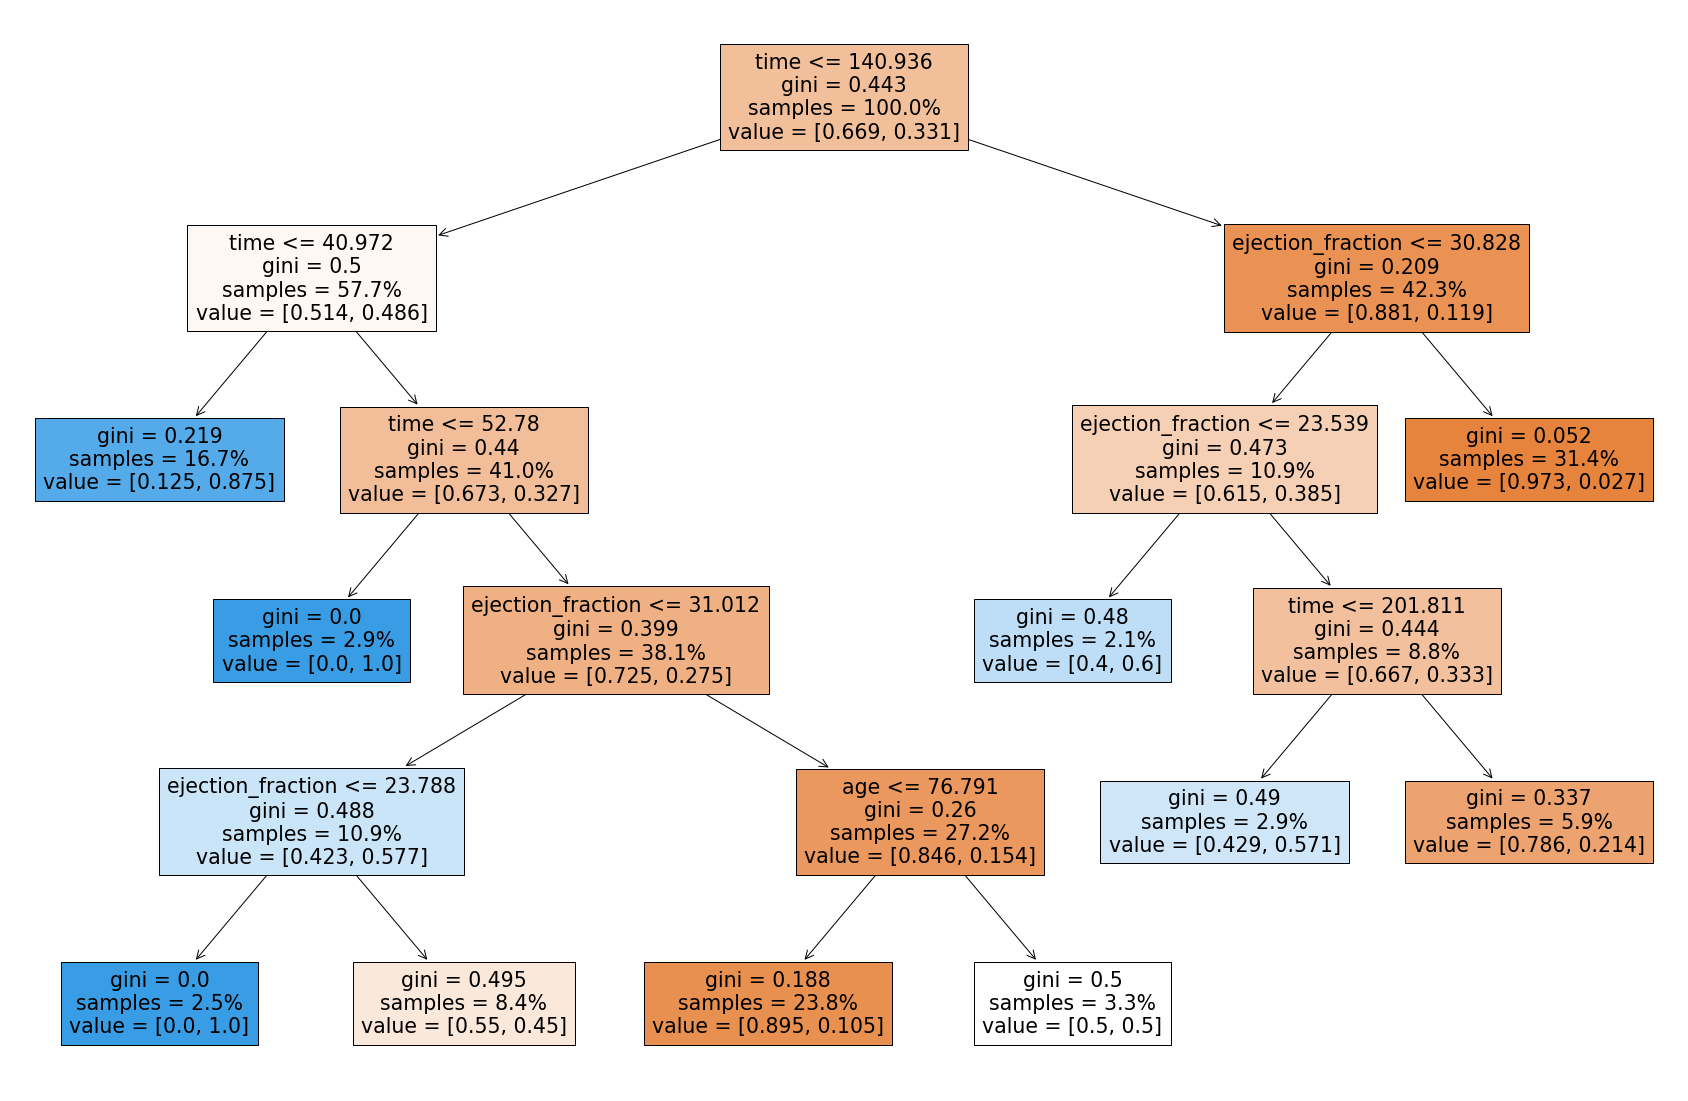

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30,20))
plot_tree(treee, filled = True, feature_names = x.columns, proportion = True)

In [27]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

In [42]:
X=ht.drop(['DEATH_EVENT'], axis=1)
y=ht['DEATH_EVENT']  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

In [43]:
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111
